In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
sf = pd.read_csv('sf.csv')

/Users/toddhendricks/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
sf.shape

(905070, 22)

In [4]:
pd.pivot_table(sf,values='search_conducted',index='subject_race',columns='outcome',aggfunc=np.sum)

outcome,arrest,citation,warning
subject_race,,,
asian/pacific islander,600.0,1395.0,544.0
black,2573.0,10251.0,8019.0
hispanic,1407.0,5022.0,1924.0
other,547.0,1652.0,749.0
white,2071.0,5493.0,2288.0


In [10]:
sf_df = sf[[
    'subject_age',
    'subject_race',
    'subject_sex',
    'type',
    'citation_issued',
    'outcome',
    'search_conducted',
    'search_vehicle'
]]

In [11]:
sf_df.dtypes
x = sf_df['subject_race'].astype('category')
y = sf_df['subject_age']

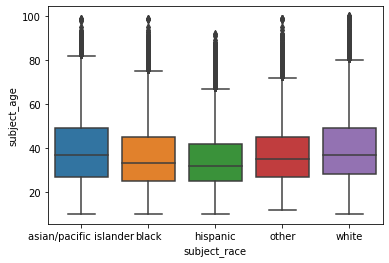

In [12]:
sns.boxplot(x=x,y=y)

In [13]:
sf_df['outcome'].astype('category')
x = sf_df['outcome']

In [14]:
x = sf_df['outcome'].str.strip().astype('category').values

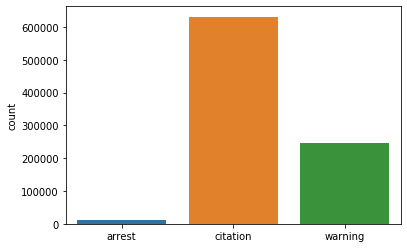

In [15]:
sns.countplot(x=x,data=sf_df)

In [16]:
arrest = sf_df[sf_df.outcome == 'arrest']
citation = sf_df[sf_df.outcome == 'citation']
warning = sf_df[sf_df.outcome == 'warning']

In [17]:
arrest.subject_race.value_counts()

white                     3970
black                     3540
hispanic                  2284
asian/pacific islander    1221
other                      910
Name: subject_race, dtype: int64

In [18]:
warning.shape

(245862, 8)

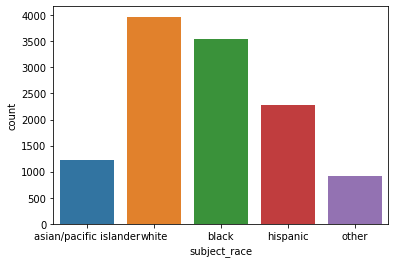

In [19]:
sns.countplot(x=arrest['subject_race'])

In [20]:
search_person = sf_df[sf_df.search_conducted == True]
search_person

,subject_age,subject_race,subject_sex,type,citation_issued,outcome,search_conducted,search_vehicle
23,NaN,white,male,vehicular,True,citation,True,True
29,NaN,asian/pacific islander,male,vehicular,False,arrest,True,True
125,NaN,black,male,vehicular,False,warning,True,True
127,NaN,white,male,vehicular,True,citation,True,True
134,NaN,black,male,vehicular,False,arrest,True,True
...,...,...,...,...,...,...,...,...
904940,NaN,black,male,vehicular,False,warning,True,True
904975,NaN,hispanic,male,vehicular,True,citation,True,True
905024,NaN,black,male,vehicular,True,citation,True,True
905028,NaN,black,male,vehicular,False,warning,True,True


In [21]:
search_vehicle = sf_df[sf_df.search_vehicle == True]
search_vehicle.subject_race.value_counts()

black                     23622
white                     11707
hispanic                  11445
other                      3746
asian/pacific islander     2861
Name: subject_race, dtype: int64

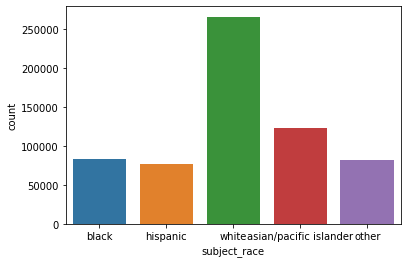

In [22]:
sns.countplot(x=citation['subject_race'])

In [45]:
search_vehicle.shape

(53381, 8)

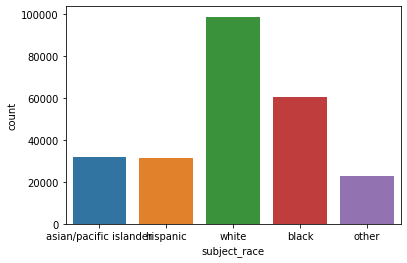

In [23]:
sns.countplot(x=warning['subject_race'])

In [31]:
black_pop = 48870
white_pop = 390387
asian_pop = 267915
hisp_pop = 121744

In [32]:
blk_arrests = arrest[arrest.subject_race == 'black']
hisp_arrests = arrest[arrest.subject_race == 'hispanic'] 
white_arrests = arrest[arrest.subject_race == 'white']
asian_pop = arrest[arrest.subject_race == 'asian/pacific'] 

In [37]:
blk_arrests.outcome.value_counts()
# arr_per_cap_blk = ((blk_arrests / black_pop) * 100)
# arr_per_cap_blk

arrest    3540
Name: outcome, dtype: int64

In [75]:
white_per_cap = ((390387 / white_pop) *)

In [39]:
3540/black_pop * 100

7.243707796193983

In [41]:
white_arrests.outcome.value_counts()

arrest    3970
Name: outcome, dtype: int64

In [44]:
3970/white_pop * 100

1.0169396009600729